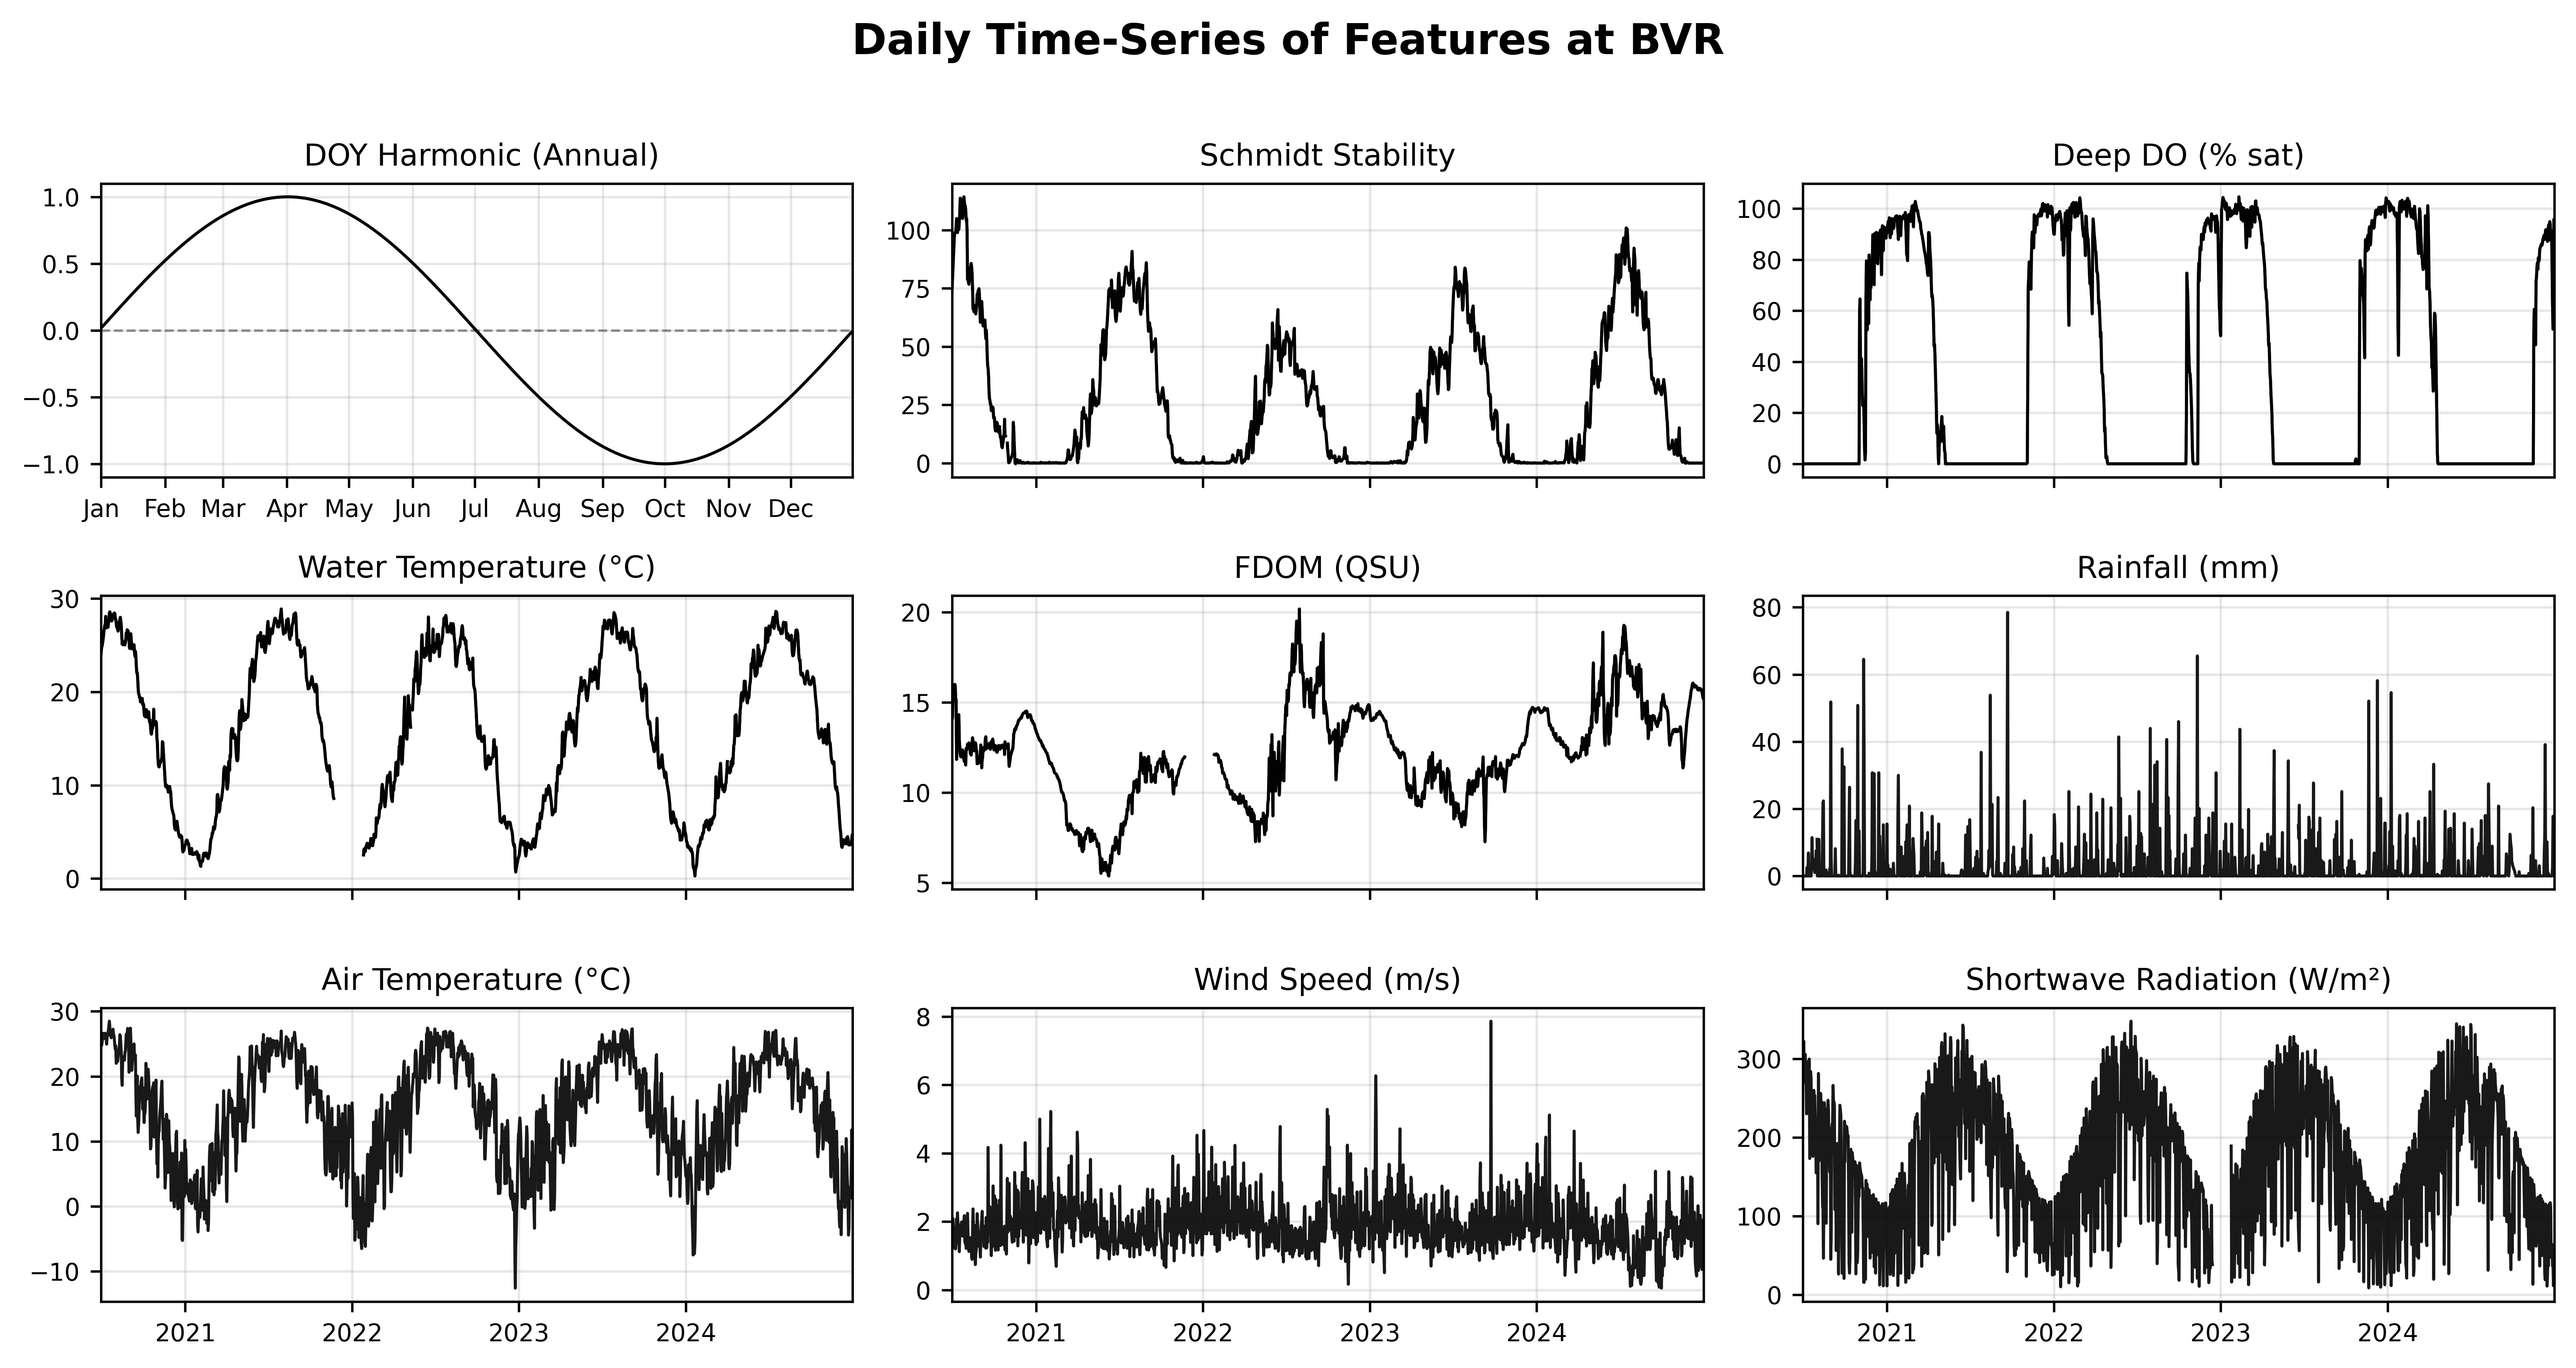

In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from matplotlib.dates import AutoDateLocator, ConciseDateFormatter
from pathlib import Path
import matplotlib.dates as mdates

# --- 1. Data Loading and Preprocessing ---

path = Path("FCR_BVR_Met_daily_obs_2019_2024.csv")
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date').sort_index()

# --- 2 DOY Harmonic ---

df['day_of_year'] = df.index.dayofyear
df['sine'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)

# --- 3. Data Subsetting for BVR ---

bvr_cols = [c for c in df.columns if c.startswith("BVR_")]
met_cols = [c for c in df.columns if 'mean_' in c or 'sum_' in c] + ['sine']
bvr_data = df[bvr_cols + met_cols].copy()

# --- 4. Plotting Configuration ---

variable_names = {
    'Sine': ' DOY Harmonic (Annual)',
    'BVR_mean_schmidt_stability': 'Schmidt Stability',
    'BVR_mean_RDOsat_percent_13': 'Deep DO (% sat)',
    'BVR_mean_EXOTemp_C_1.5': 'Water Temperature (°C)',
    'BVR_mean_EXOfDOM_QSU_1.5': 'FDOM (QSU)',
    'sum_Rain_Total_mm': 'Rainfall (mm)',
    'mean_AirTemp_C_Average': 'Air Temperature (°C)',
    'mean_WindSpeed_Average_m_s': 'Wind Speed (m/s)',
    'mean_ShortwaveRadiationUp_Average_W_m2': 'Shortwave Radiation (W/m²)',
#    'sine': 'DOY Harmonic (Full Timeseries)'
}


cols_to_plot = ['Sine'] + [col for col in variable_names if col in bvr_data.columns and col != 'Sine']
n_plots = len(cols_to_plot)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# --- 5. Plotting attributes ---

fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4.0 * n_cols, 2.2 * n_rows),
    dpi=600,
    sharex=False
)
axes = axes.flatten()

ax0 = axes[0]
df_2021 = bvr_data.loc['2021'].copy()
ax0.plot(df_2021.index, df_2021['sine'], color='black', lw=1)
ax0.set_title(variable_names['Sine'], fontsize=10)
ax0.tick_params(labelsize=8)
ax0.grid(True, alpha=0.3)
ax0.set_xlim(pd.to_datetime('2021-01-01'), pd.to_datetime('2021-12-31'))
ax0.xaxis.set_major_locator(mdates.MonthLocator())
ax0.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
ax0.axhline(0, color='black', linestyle='--', alpha=0.4, lw=0.8)


locator = mdates.YearLocator()
formatter = mdates.DateFormatter('%Y')

for i in range(2, n_plots):
    axes[i].sharex(axes[1])

for i in range(1, n_plots):
    ax = axes[i]
    col = cols_to_plot[i]
    s = bvr_data[col]

    ax.plot(s.index, s.values, lw=1.0, alpha=0.9, color='k')
    ax.grid(True, alpha=0.3)
    ax.set_title(variable_names[col], fontsize=10)
    ax.tick_params(labelsize=8)

    # Configure the shared x-axis.
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    if i < (n_rows - 1) * n_cols:
         ax.tick_params(axis='x', labelbottom=False)

start_date = pd.to_datetime('2020-07-01')
end_date = pd.to_datetime('2024-12-31')
plt.setp(axes[1:], xlim=(start_date, end_date))

# Turn off any unused subplots.
for j in range(n_plots, len(axes)):
    axes[j].axis("off")

fig.suptitle("Daily Time-Series of Features at BVR", fontsize=14, fontweight='bold')
fig.tight_layout(rect=[0, 0.03, 1, 0.97])
fig.savefig("BVR_Features.png", bbox_inches="tight")
plt.show()

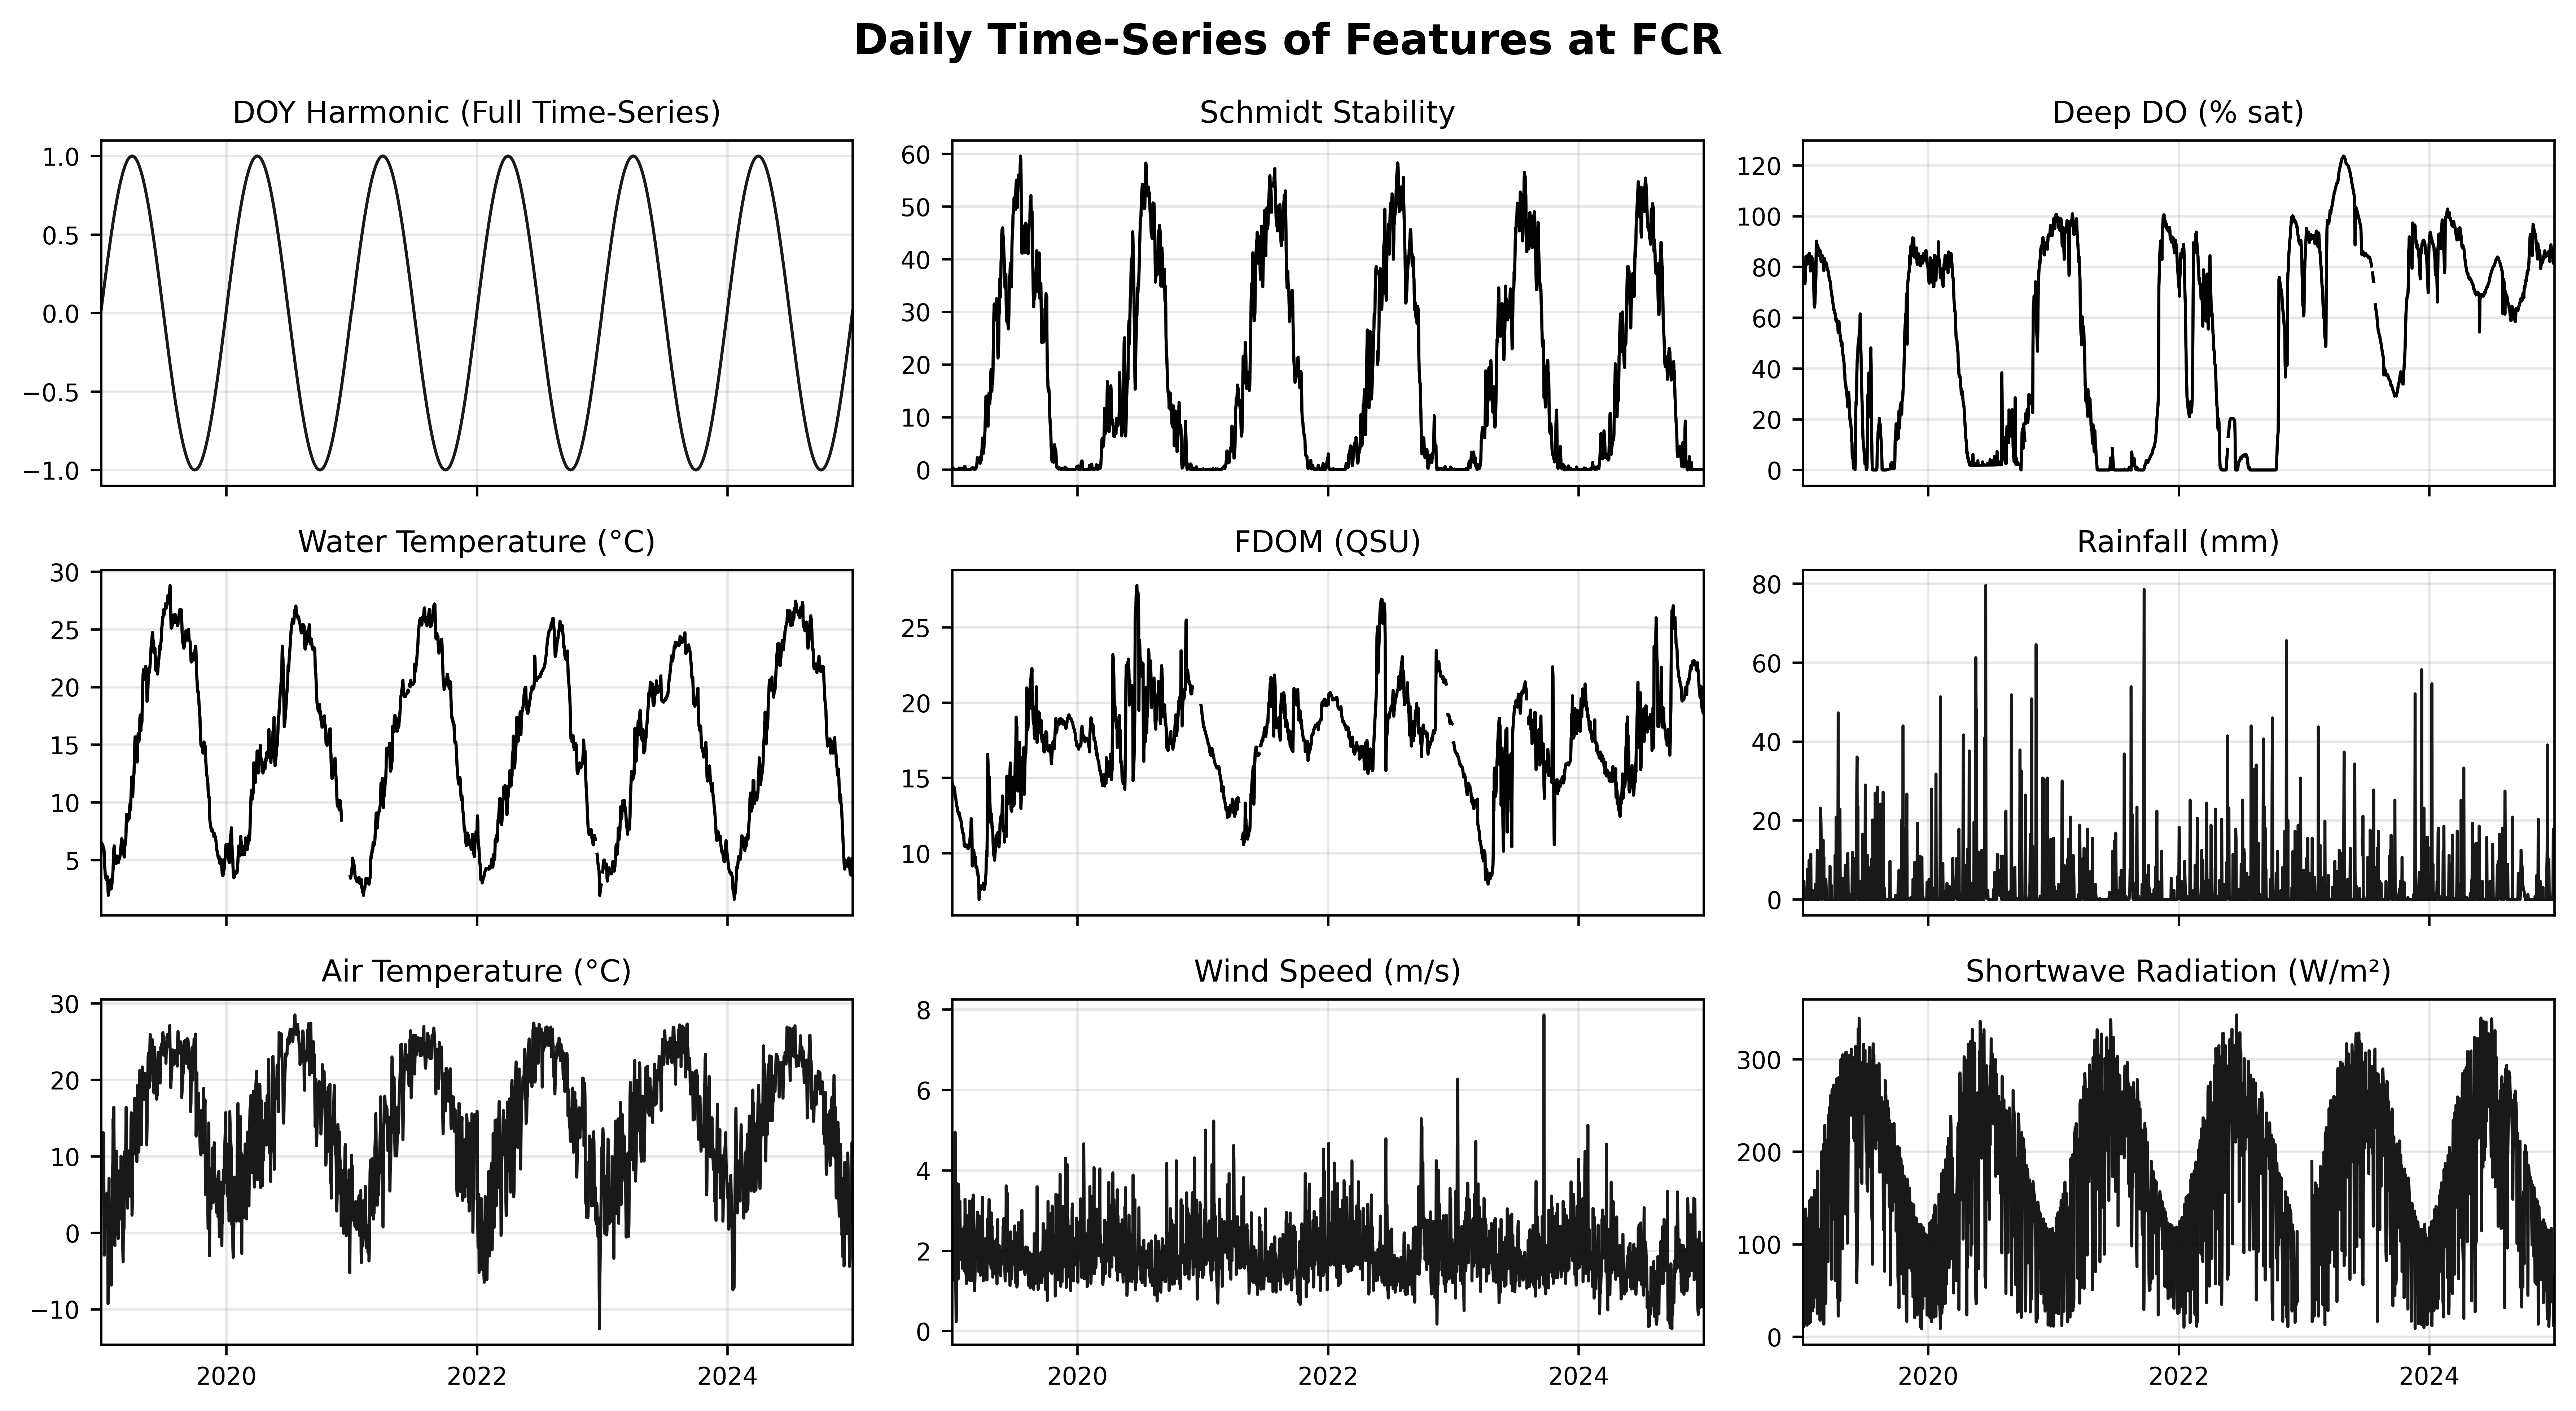

In [2]:
 #--- 1. Data Loading and Preprocessing ---

path = Path("FCR_BVR_Met_daily_obs_2019_2024.csv")
df = pd.read_csv(path, parse_dates=['Date'], index_col='Date').sort_index()

# --- 2. DOY Harmonic (Time series)---

df['day_of_year'] = df.index.dayofyear
df['sine'] = np.sin(2 * np.pi * df['day_of_year'] / 365.25)

# --- 3. Data Subsetting for FCR ---
fcr_cols = [c for c in df.columns if c.startswith("FCR_")]
met_cols = [c for c in df.columns if 'mean_' in c or 'sum_' in c] + ['sine']
fcr_data = df[fcr_cols + met_cols].copy()

# --- 4. Plotting Configurations ---

variable_names = {
#    'FCR_mean_EXOChla_ugL_1': 'Chlorophyll-a (μg/L)',
    'sine': 'DOY Harmonic (Full Time-Series)',
    'FCR_mean_schmidt_stability': 'Schmidt Stability',
    'FCR_mean_RDOsat_percent_9_adjusted': 'Deep DO (% sat)',
    'FCR_mean_EXOTemp_C_1': 'Water Temperature (°C)',
    'FCR_mean_EXOfDOM_QSU_1': 'FDOM (QSU)',
    'sum_Rain_Total_mm': 'Rainfall (mm)',
    'mean_AirTemp_C_Average': 'Air Temperature (°C)',
    'mean_WindSpeed_Average_m_s': 'Wind Speed (m/s)',
    'mean_ShortwaveRadiationUp_Average_W_m2': 'Shortwave Radiation (W/m²)',
}

# Filter
cols_to_plot = [col for col in variable_names if col in fcr_data.columns]
n_plots = len(cols_to_plot)
n_cols = 3
n_rows = math.ceil(n_plots / n_cols)

# --- 5. Plotting Attribution---

fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4.0 * n_cols, 2.2 * n_rows),
    dpi=600,
    sharex=True
)
axes = axes.flatten()


locator = AutoDateLocator(maxticks=4)
formatter = ConciseDateFormatter(locator)

for i, col in enumerate(cols_to_plot):
    ax = axes[i]
    s = fcr_data[col]

    ax.plot(s.index, s.values, lw=1.0, alpha=0.9, color='k')
    ax.grid(True, alpha=0.3)
    ax.set_title(variable_names[col], fontsize=10)
    ax.tick_params(labelsize=8)

    # Configure the shared x-axis.
    ax.xaxis.set_major_locator(locator)
    ax.xaxis.set_major_formatter(formatter)
    if i < (n_rows - 1) * n_cols:
        ax.tick_params(axis='x', labelbottom=False)

# --- date parse---
start_date = pd.to_datetime('2019-01-01')
end_date = pd.to_datetime('2024-12-31')
plt.setp(axes, xlim=(start_date, end_date))

# Turn off any unused subplots.
for j in range(i + 1, len(axes)):
    axes[j].axis("off")

fig.suptitle("Daily Time-Series of Features at FCR", fontsize=14, fontweight='bold')
fig.tight_layout()
fig.savefig("FCR_features.png", bbox_inches="tight")
plt.show()